# Floating block

See http://farside.ph.utexas.edu/teaching/336L/Fluidhtml/node32.html  
and http://datagenetics.com/blog/june22016/index.html

Consider a long block with a unit square cross-section floating in a liquid. The liquid has a unit density and the bar has a uniform density of $\rho$. Determine the stable equilibrium positions, $\theta$, for all values of $\rho$.

![Block at angle in liquid](floating.svg)

## Three sides wetted

Reorient our point of view to make the analysis easier. Start by assuming that three sides of the block are at least partially immersed. Assume also that $\rho \le 1/2$ and $\theta \le 45°$.

![Reoriented block with three wetted sides](three-sides.svg)

In [1]:
from sympy import *
init_printing()

In [2]:
alpha, beta, rho, x, y, theta = symbols('alpha beta rho x y theta')

Geometric equations:

In [3]:
e1 = rho - (alpha + beta)/2
e2 = tan(theta) - (alpha - beta)
s12 = solve((e1, e2), (alpha, beta))

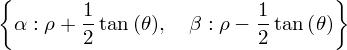

In [4]:
s12

Position of the center of buoyancy, $(x, y)$:

In [5]:
x = (Rational(1,2)*beta + Rational(1,3)*Rational(1,2)*(alpha-beta))/rho
y = (beta/2*beta + (beta + Rational(1,3)*(alpha-beta))*Rational(1,2)*(alpha-beta))/rho

In [6]:
x = expand(x.subs(s12))

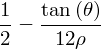

In [7]:
x

In [8]:
y = expand(y.subs(s12))

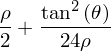

In [9]:
y

Square of the distance from the center of mass of the block, $(1/2, 1/2)$, to the center of buoyancy, $r^2$

In [10]:
r2 = (Rational(1,2) - x)**2 + (Rational(1,2) - y)**2

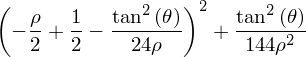

In [11]:
r2

We want to minimize this w.r.t. $\theta$. To make the math easier, note that $\tan \theta$ is monotonic with $\theta$ over the range of interest, $0 \le \theta \le \pi/4$. So we can substitute $t = \tan \theta$ into the expression for $r^2$ and minimize w.r.t. $t$.

In [12]:
t = symbols('t')

In [13]:
r2 = r2.subs(tan(theta), t)

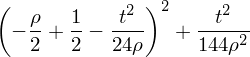

In [14]:
r2

In [15]:
d1 = diff(r2, t)

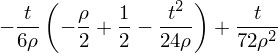

In [16]:
d1

In [17]:
sd1 = solve(d1, t)

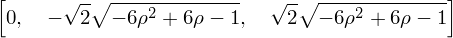

In [18]:
sd1

There are three solutions. The first is the simplest: $t = 0$, which means $\theta = 0$. To determine whether this is a stable equilibrium position, we check the sign of the second derivative at $t = 0$.

In [19]:
d2 = diff(d1, t)

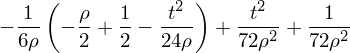

In [20]:
d2

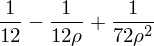

In [21]:
expand(d2.subs(t, 0))

This is positive for very small values of $\rho$, but will flip signs as $rho$ gets larger. To find the crossover point, solve for $\rho$ when this becomes zero.

In [22]:
s3 = solve(expand(d2.subs(t, 0)), rho)

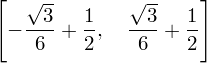

In [23]:
s3

The second solution is greater than $1/2$, so it's outside the range for which our analysis is valid. Therefore, the crossover point corresponds to the first solution and we have a stable solution of

$$ \theta = 0 \quad \text{for} \quad 0 \le \rho \le \frac{1}{2} - \frac{\sqrt{3}}{6} $$

In decimal form, the upper bound on $\rho$ is

In [24]:
s3[0].evalf()

Now let's look at the other two solutions. We can eliminate the second solution immediately, as it is negative and our analysis was set up for positive angles only. For the third solution to be valid, the discriminant has to be greater than or equal to zero.

In [25]:
print(sd1[2])

sqrt(2)*sqrt(-6*rho**2 + 6*rho - 1)


In [26]:
discriminant = -6*rho**2 + 6*rho - 1

In [27]:
discriminant

This is negative for small values of $\rho$. To determine where it crosses over to positive values, set it equal to zero and solve for $\rho$.

In [28]:
s4 = solve(discriminant, rho)

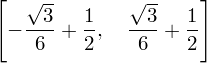

In [29]:
s4

This is the same solution we got for the stability of the $\theta = 0$ equilibrium point. This shouldn't be surprising, as the expression for the discriminant is a multiple of the expression for the second derivative at $\theta=0$.

In [30]:
print(latex(sd1[2]))

\sqrt{2} \sqrt{- 6 \rho^{2} + 6 \rho - 1}


So we have an equilibrium solution of

$$ \tan \theta = \sqrt{2} \sqrt{- 6 \rho^{2} + 6 \rho - 1} \quad \text{for} \quad \rho \ge \frac{1}{2} - \frac{\sqrt{3}}{6} $$

This solution is valid only for $\beta \ge 0$, because we started with the assumption that three sides of the block are wetted. Let's see how this limit can be expressed as a limit on $\rho$.

In [31]:
ebeta = beta.subs(s12).subs(tan(theta), sd1[2])

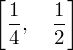

In [32]:
solve(ebeta, rho)

We get two solutions for $\rho$. The second, $\rho=1/2$, is a valid solution, but matches only the special case where the block is half-submerged with two opposite corners at the waterline. The first solution is the one that matches an intermediate angle. Therefore, our intermediate equilibrium solution is

$$ \tan \theta = \sqrt{2} \sqrt{- 6 \rho^{2} + 6 \rho - 1} \quad \text{for} \quad \frac{1}{2} - \frac{\sqrt{3}}{6} \le \rho \le \frac{1}{4} $$

We still haven't checked to see if this is a stable solution, though. We'll substitute this value of $t$ into the expression for the second derivative of $r^4$ and see what the sign is.

In [33]:
d22 = expand(d2.subs(t, sqrt(2)*sqrt(-6*rho**2 + 6*rho - 1)))

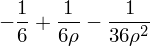

In [34]:
d22

In [35]:
d22.subs(rho, Rational(1,4))

In [36]:
simplify(d22.subs(rho, Rational(1,2) - sqrt(3)/6))

In [37]:
d22.subs(rho, .213)

If I knew SymPy better, I'd probably be able to show that the second derivative is greater than zero for all values of $\rho$ in the range for which we have an intermediate equilibrium solution. But I can test it for many values between 0.2113 and .25, and it works for all of them. So I'm going to conclude that the intermediate equilibrium solution is stable over that entire range of $\rho$.

## Two sides wetted

We're sticking with the assumption that $\rho \le 1/2$, but now we're assuming that the block has tilted far enough that only two sides are partially immersed.

![Block with two sides wetted](two-sides.svg)

Geometric equations:

In [38]:
e4 = rho - alpha*beta/2
e5 = tan(theta) - alpha/beta
s45 = solve((e4, e5), (alpha, beta))

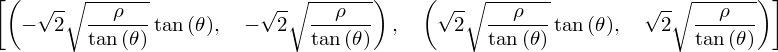

In [39]:
s45

Only the second makes physical sense because it gives positive values.

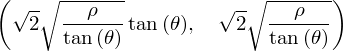

In [40]:
s45[1]

In [41]:
alpha = s45[1][0]

In [42]:
beta = s45[1][1]

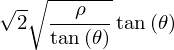

In [43]:
alpha

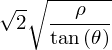

In [44]:
beta

Coordinates of the center of buoyancy

In [45]:
x = Rational(1,3)*beta
y = Rational(1,3)*alpha

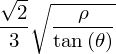

In [46]:
x

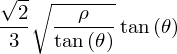

In [47]:
y

As before, get an expression for the square of distance from the center of mass of the block to the center of buoyancy, $r^2$:

In [48]:
r2 = (Rational(1,2) - x)**2 + (Rational(1,2) - y)**2

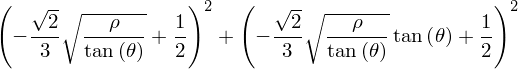

In [49]:
r2

Simplify the math by substituting $t$ for $\tan \theta$.

In [50]:
r2 = r2.subs(tan(theta), t)

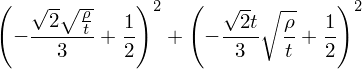

In [51]:
r2

Find the equilibrium positions by taking the derivative w.r.t. $t$ and setting it equal to zero.

In [52]:
d3 = diff(r2, t)

In [53]:
d3 = expand(d3)

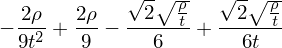

In [54]:
d3

In [55]:
sd3 = solve(d3, t)

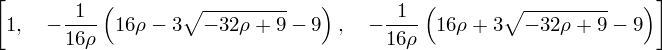

In [56]:
sd3

In the first solution, $t = \tan \theta = 1$, the block is tipped to a 45° angle, which is an obvious solution. To determine whether this is a stable position, we investigate the second derivative at $t= 1$.

In [57]:
d4 = diff(d3, t)

In [58]:
d41 = d4.subs(t, 1)

In [59]:
d41.subs(rho, .25).evalf()

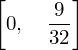

In [60]:
solve(d4.subs(t, 1))

In [61]:
d41.subs(rho, 9/32).evalf()

In [62]:
d41.subs(rho, 10/32).evalf()

The second derivative is positive for $\rho \ge 9/32$, so we have stable equilibrium at

$$ \theta = \frac{\pi}{4} \quad \text{for} \quad \frac{9}{32} \le \rho \le \frac{1}{2} $$

Now let's explore the other solutions.

In [63]:
sd31 = expand(sd3[1])

In [64]:
sd32 = expand(sd3[2])

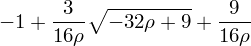

In [65]:
sd31

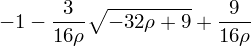

In [66]:
sd32

In both cases, the discriminant is non-negative when $\rho \le 9/32$, so that condition must be met for valid solutions.

In [67]:
sd31.subs(rho, .27)

In [68]:
sd32.subs(rho, .27)

The second solution is gives $t = \tan \theta \gt 1$, so it isn't valid because it violates our initial assumptions. The third solution is valid. Let's now look for its lower bound, which is when $\beta = 1$.

In [69]:
print(sd32)

-1 - 3*sqrt(-32*rho + 9)/(16*rho) + 9/(16*rho)


In [70]:
print(latex(sd32))

-1 - \frac{3}{16 \rho} \sqrt{- 32 \rho + 9} + \frac{9}{16 \rho}


In [71]:
solve(1 - beta.subs(tan(theta), -1 - 3*sqrt(-32*rho + 9)/(16*rho) + 9/(16*rho)), rho)

So we have this equilibrium solution for the case of two wetted sides:

$$ \tan \theta = -1 - \frac{3}{16 \rho} \sqrt{- 32 \rho + 9} + \frac{9}{16 \rho} \quad \text{for} \quad \frac{1}{4} \le \rho \le \frac{9}{32} $$

We need to see if this is a stable equilibrium.

In [72]:
d43 = d4.subs(t, sd32)

In [73]:
d43.subs(rho, .25).evalf()

In [74]:
d43.subs(rho, 9/32-.01).evalf()

The second derivative of $r^2$ is positive, so this is a stable equilibrium.

## Summary

The stable equilibrium positions are

$$ \theta = 0 \quad \text{for} \quad 0 \le \rho \le \frac{1}{2} - \frac{\sqrt{3}}{6} $$

$$ \tan \theta = \sqrt{2} \sqrt{- 6 \rho^{2} + 6 \rho - 1} \quad \text{for} \quad \frac{1}{2} - \frac{\sqrt{3}}{6} \le \rho \le \frac{1}{4} $$

$$ \tan \theta = - \frac{1}{16 \rho} \left(16 \rho + 3 \sqrt{- 32 \rho + 9} - 9\right) \quad \text{for} \quad \frac{1}{4} \le \rho \le \frac{9}{32} $$

$$ \theta = \frac{\pi}{4} \quad \text{for} \quad \frac{9}{32} \le \rho \le \frac{1}{2} $$

When the density is greater than $1/2$, the solutions are equivalent to those for $\rho^\prime = 1 - \rho$.

## Plotting results

In [75]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [76]:
density = [z/200 for z in range(201) ]

In [77]:
def ang(dens):
    if dens > 1/2:
        dens = 1 - dens
    if  0 <= dens < 1/2 - 1/sqrt(12):
        return 0
    elif 1/2 - 1/sqrt(12) <= dens < 1/4:
        return atan(sqrt(2)*sqrt(-6*dens**2 + 6*dens - 1)).evalf()
    elif 1/4 <= dens < 9/32:
        return atan(-(16*dens + 3*sqrt(-32*dens + 9) - 9)/(16*dens)).evalf()
    else:
        return (pi/4).evalf()

In [78]:
angle = [ ang(dens)*180/pi for dens in density ]

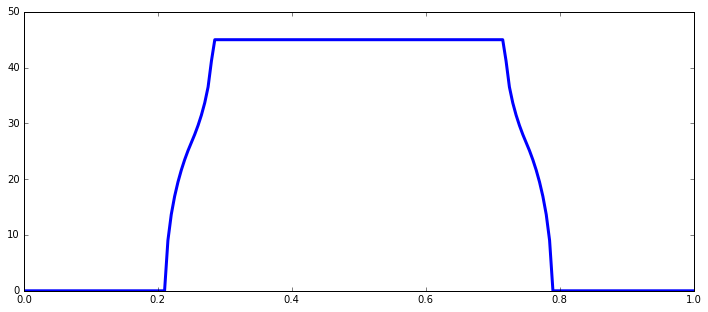

In [79]:
rcParams['figure.figsize'] = (12, 5)
plt.plot(density, angle, linewidth=3)
plt.ylim(0, 50)